# Data preprocessing

In [1]:
import scipy.io as sio
import numpy as np
# load data 
dataSetfile = "../L-R hand/dataset_BCIcomp1.mat"
testLabelfile = "../test/labels_data_set_iii.mat"
dataSet = sio.loadmat(dataSetfile)
LabelSet = sio.loadmat(testLabelfile)
# concat data 
#dataTrain = np.concatenate([dataSet['x_train'],dataSet['x_test']], axis=2)
dataTrain = np.concatenate([dataSet['x_train'],dataSet['x_test']], axis=2)
dataLabel = np.concatenate([dataSet['y_train'],LabelSet['y_test']])
print('data shape:',dataTrain.shape)

data shape: (1152, 3, 280)


In [2]:
dataTrain[:][0][0]

array([ 0.01025391, -0.09179688,  0.05664062, -0.12548828,  0.01611328,
        0.08691406, -0.08691406, -0.13574219,  0.03955078, -0.06103516,
       -0.10498047,  0.07421875, -0.25878906,  0.03613281,  0.05175781,
        0.08496094, -0.04150391,  0.03564453,  0.01611328,  0.04296875,
       -0.17236328,  0.00146484, -0.01513672, -0.09228516, -0.09814453,
        0.13964844,  0.109375  , -0.16015625,  0.05712891,  0.27099609,
        0.05810547,  0.03710938, -0.03076172,  0.01025391, -0.04736328,
       -0.07519531, -0.06298828,  0.14111328,  0.08154297,  0.08007812,
       -0.04199219,  0.12597656, -0.01904297,  0.07666016,  0.16992188,
       -0.07861328,  0.13574219,  0.00927734, -0.05712891, -0.07910156,
        0.00097656,  0.02246094, -0.08642578, -0.01806641, -0.04980469,
       -0.00244141,  0.15527344, -0.01708984,  0.01513672,  0.08984375,
       -0.140625  ,  0.08105469, -0.00146484,  0.15429688,  0.05615234,
        0.03808594, -0.03076172, -0.04931641,  0.10351562,  0.01

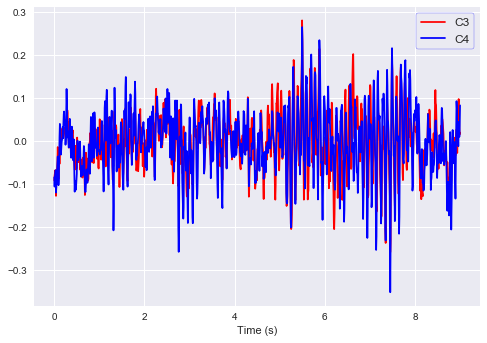

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
sampleRate = 128      # EEG sample rate
t = np.linspace(0,dataTrain.shape[0]/sampleRate,dataTrain.shape[0])  # 0-1152/128s，step = 1/sampleRate =1s
i = 1
C3 = dataTrain[:,0,i]
C4 = dataTrain[:,2,i]
CZ = dataTrain[:,1,i]
plt.plot(t, C3, 'r', label='C3')
plt.plot(t, C4, 'b', label='C4')
# plt.plot(t, CZ, 'g', label='CZ') #  plot i trail
plt.xlabel('Time (s)')
plt.legend(loc='upper right',fontsize='large',frameon=True,edgecolor='blue')   

# Filter（Butterworth）

1152
想象右手运动


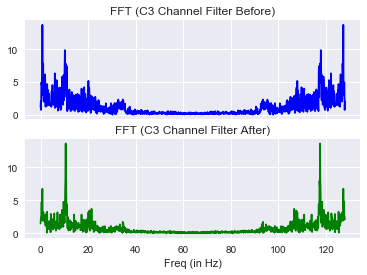

In [4]:
'''
bandpass [8 30]
mu and beta rhythm
'''

import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.signal import butter, lfilter
  
    
    
def butter_bandpass_filter(data, lowcut, highcut, fs, order=8):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a

#the classical filter is designed based on Fourier analysis and transform
# FFT transfrom

i =50 # index 
dataFtt = np.fft.fft(dataTrain[:,0,i])  # C3 channel
Freq = np.linspace(0,sampleRate,dataTrain.shape[0])
# plot FFT（50 trail）

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(Freq, np.abs(dataFtt), color='blue')
ax1.set_title('FFT (C3 Channel Filter Before)')
plt.xlabel('Freq (in Hz)')

filterY = butter_bandpass_filter(dataTrain,8,30,sampleRate, 8)
dataFtt = np.fft.fft(filterY[:,0,i])    # C3通道
print(len(Freq))
ax2.plot(Freq, np.abs(dataFtt), color='green')
ax2.set_title('FFT (C3 Channel Filter After)')
plt.xlabel('Freq (in Hz)')


label = dataLabel[50]
if label == 1:
    print('想象左手运动')
else:
    print('想象右手运动')

In [4]:
dataTrain = butter_bandpass_filter(dataTrain,8,30,sampleRate, 8)
# dataTest = butter_bandpass_filter(dataTest,8,30,sampleRate, 5)

# 小波去噪

In [5]:
import pywt
import matplotlib.pyplot as plt

TimeStart = 3                     # start time
TimeEnd = 9                       # end time 
sampling_rate = 128 
samplePointStart=TimeStart*sampleRate
samplePointEnd=TimeEnd*sampleRate


# data capture 3-6s
dataTrainC3 = dataTrain[samplePointStart:samplePointEnd,0,:]
dataTrainCZ = dataTrain[samplePointStart:samplePointEnd,1,:]
dataTrainC4 = dataTrain[samplePointStart:samplePointEnd,2,:]

# X = range(0, 768)
# w = pywt.Wavelet('db5') # 选用Daubechies5小波
# maxlev = pywt.dwt_max_level(len(dataTrainC3), w.dec_len)#分解尺度
# #print("maximum level is " + str(maxlev))
# threshold = 0.04 # Threshold for filtering


# for i in range(280):
       
#         waveC3 = pywt.wavedec(dataTrainC3[:,i], 'db5', level=maxlev) # 将信号进行4阶小波分解
#         waveC4 = pywt.wavedec(dataTrainC4[:,i], 'db5', level=maxlev)
#         waveCZ = pywt.wavedec(dataTrainCZ[:,i], 'db5', level=maxlev)

#         for t in range(len(waveC3)):
#                 waveC3[t] = pywt.threshold(waveC3[t], threshold*max(waveC3[t])) # 门限阈值对所分解的小波系数进行权重处理，然后对小信号再进行重构即可达到信号去噪的目的   
#                 waveC4[t] = pywt.threshold(waveC4[t], threshold*max(waveC4[t]))
#                 waveCZ[t] = pywt.threshold(waveCZ[t], threshold*max(waveCZ[t]))

#         dataTrainC3[:,i] = pywt.waverec(waveC3,'db5')
#         dataTrainC4[:,i] = pywt.waverec(waveC4,'db5')
#         dataTrainCZ[:,i] = pywt.waverec(waveCZ,'db5')


# Feature Extraction (Wavelet Transform)

/Users/yuanxue/anaconda3/lib/python3.6/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
/Users/yuanxue/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


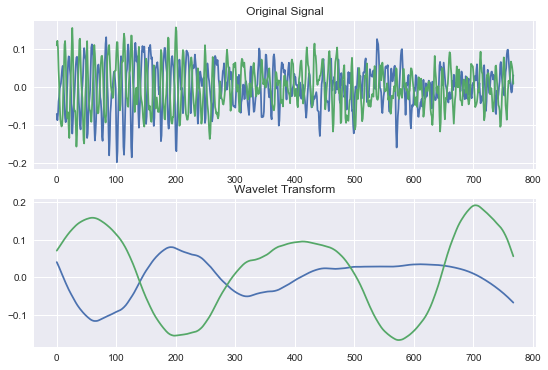

In [6]:
'''
Wavelet transfrom 
Time-frequency diagram combination
select 3-6s EEG data every trial
'''
import pywt
import pywt.data

sampling_rate = 128 
wavename = 'db5'    
totalscal = 64    # scale 
fc = pywt.central_frequency(wavename) #  central frequency
cparam = 2 * fc * totalscal
scales = cparam/np.arange(1,totalscal+1)
t = np.arange(3,6.0,1.0/sampling_rate)

X = range(0, 768)

waveC3_5_0 = pywt.wavedec(dataTrainC3[:,215],wavename,level=8) 
ya4 = pywt.waverec(np.multiply(waveC3_5_0, [0, 1, 0, 0, 0, 0, 0, 0, 0]).tolist(), 'db5')#第4层近似分量

waveC3_5_1 = pywt.wavedec(dataTrainC3[:,120],wavename,level=8) 
yd4 = pywt.waverec(np.multiply(waveC3_5_1, [0, 1, 0, 0, 0, 0, 0, 0, 0]).tolist(), 'db5')#第4层近似分量


waveC3_5_0 = [x*10 for x in waveC3_5_0]
ya4 = [x*10 for x in ya4]

waveC3_5_1 = [x*10 for x in waveC3_5_1]
yd4 = [x*10 for x in yd4]


fig = plt.figure()



plt.figure(figsize=(9, 6))
plt.legend(ncol=1)
plt.subplot(211)
plt.plot(X, dataTrainC3[:,108], label = 'class 1')
plt.plot(X, dataTrainC3[:,104], label = 'class 2')
plt.title('Original Signal')

plt.subplot(212)
plt.plot(X, ya4, label = 'class 1')
plt.plot(X, yd4, label = 'class 2')
plt.title('Wavelet Transform')



In [7]:
'''
Wavelet transfrom 
Time-frequency diagram combination
select 3-6s EEG data every trial
'''

import pywt
import pywt.data

sampling_rate = 128 
wavename = 'morl'    
totalscal = 64    # scale 
fc = pywt.central_frequency(wavename) #  central frequency
cparam = 2 * fc * totalscal
scales = cparam/np.arange(1,totalscal+1)
t = np.arange(3,6.0,1.0/sampling_rate)

# wavelet transfrom 
for i in range(280):
    figureName = str(i)
    [cwtmatr3, frequencies3] = pywt.cwt(dataTrainC3[:,i],scales,wavename,1.0/sampling_rate) 
    [cwtmatrZ, frequenciesZ] = pywt.cwt(dataTrainCZ[:,i],scales,wavename,1.0/sampling_rate)
    [cwtmatr4, frequencies4] = pywt.cwt(dataTrainC4[:,i],scales,wavename,1.0/sampling_rate) 
    
    cwtmatr = np.concatenate([abs(cwtmatr3), abs(cwtmatrZ), abs(cwtmatr4)],axis=0)
    
    
    fig = plt.figure()
    plt.contourf(cwtmatr)
    plt.xticks([])  # remove x
    plt.yticks([])  # remove y
    plt.axis('off') # remove axis
    fig.set_size_inches(800/100.0,600/100.0)#  set pixels width*height
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace =0, wspace =0) 
    plt.margins(0,0)
#     plt.colorbar()
    
    if dataLabel[i] == 1:
        filepath = r'../L-R hand/image/1/'+str(i)+'.jpg'
    if dataLabel[i] == 2:
        filepath = r'../L-R hand/image/2/'+str(i)+'.jpg'
  
    
    #print(filepath)  
    fig.savefig(filepath)
    fig.clear()
    
    
print('wavelet transfrom completed')

/Users/yuanxue/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


wavelet transfrom completed


In [8]:
cwtmatr3.shape

(64, 768)

# DataSet Expansion

In [16]:
from PIL import ImageEnhance
import os
import numpy as np
from PIL import Image

def brightnessEnhancement(root_path,img_name): #亮度增强
    image = Image.open(os.path.join(root_path, img_name))
    enh_bri = ImageEnhance.Brightness(image)
    # brightness = 1.1+0.4*np.random.random()#取值范围1.1-1.5
    brightness = 1.5
    image_brightened = enh_bri.enhance(brightness)
    return image_brightened


def contrastEnhancement(root_path, img_name):  # 对比度增强
    image = Image.open(os.path.join(root_path, img_name))
    enh_con = ImageEnhance.Contrast(image)
    # contrast = 1.1+0.4*np.random.random()#取值范围1.1-1.5
    contrast = 1.5
    image_contrasted = enh_con.enhance(contrast)
    return image_contrasted

def rotation(root_path, img_name):
    img = Image.open(os.path.join(root_path, img_name))
    random_angle = np.random.randint(-2, 2)*90
    if random_angle==0:
        rotation_img = img.rotate(-90) #旋转角度
    else:
        rotation_img = img.rotate( random_angle)  # 旋转角度
    # rotation_img.save(os.path.join(root_path,img_name.split('.')[0] + '_rotation.jpg'))
    return rotation_img

def flip(root_path,img_name):   #翻转图像
    img = Image.open(os.path.join(root_path, img_name))
    filp_img = img.transpose(Image.FLIP_LEFT_RIGHT)
    # filp_img.save(os.path.join(root_path,img_name.split('.')[0] + '_flip.jpg'))
    return filp_img

def createImage(imageDir,saveDir):
    i=0
    for name in os.listdir(imageDir):
        i=i+1
        saveName="cesun"+str(i)+".jpg"
        saveImage=contrastEnhancement(imageDir,name)
        saveImage.save(os.path.join(saveDir,saveName))
        saveName1 = "flip" + str(i) + ".jpg"
        saveImage1 = flip(imageDir,name)
        saveImage1.save(os.path.join(saveDir, saveName1))
#         saveName2 = "brightnessE" + str(i) + ".jpg"
#         saveImage2 = brightnessEnhancement(imageDir, name)
#         saveImage2.save(os.path.join(saveDir, saveName2))
        saveName3 = "rotate" + str(i) + ".jpg"
        saveImage = rotation(imageDir, name)
        saveImage.save(os.path.join(saveDir, saveName3))


In [17]:
# label 1
imageDir="../L-R hand/image/1" #要改变的图片的路径文件夹
saveDir="../L-R hand/1"   #数据增强生成图片的路径文件夹
createImage(imageDir,saveDir)

# label 2
imageDir="../L-R hand/image/2" #要改变的图片的路径文件夹
saveDir="../L-R hand/2"   #数据增强生成图片的路径文件夹
createImage(imageDir,saveDir)


IsADirectoryError: [Errno 21] Is a directory: '../L-R hand/image/1/.ipynb_checkpoints'

# CNN Classification

In [9]:
# load feature dataset
import os
import numpy as np
import tensorflow as tf
def get_file(filename):
    ''' load time-frequency diagram '''
#     os.remove(filename+'DS_Store')
#     os.remove(filename+'.ipynb_checkpoints')
    dataTrain = list()
    labelTrain = list()
    for label in os.listdir(filename):
        for pic in os.listdir(filename+label):
            dataTrain.append(filename+label+'/'+pic)  
            labelTrain.append(int(label))
    temp = np.array([dataTrain, labelTrain])          
    temp = np.transpose(temp)   
    np.random.shuffle(temp)
    image_list = temp[:,0]
    label_list = temp[:,1]
    label_list = [int(i) for i in label_list]  
    return image_list, label_list

pathname = "../L-R hand/image/"
image_list, label_list = get_file(pathname) 

In [10]:
len(label_list)

282

In [11]:
image_list

array(['../L-R hand/image/1/130.jpg', '../L-R hand/image/2/8.jpg',
       '../L-R hand/image/2/2.jpg', '../L-R hand/image/2/47.jpg',
       '../L-R hand/image/2/101.jpg', '../L-R hand/image/1/117.jpg',
       '../L-R hand/image/2/118.jpg', '../L-R hand/image/2/220.jpg',
       '../L-R hand/image/1/75.jpg', '../L-R hand/image/1/73.jpg',
       '../L-R hand/image/1/61.jpg', '../L-R hand/image/2/273.jpg',
       '../L-R hand/image/1/222.jpg', '../L-R hand/image/1/59.jpg',
       '../L-R hand/image/2/138.jpg', '../L-R hand/image/2/82.jpg',
       '../L-R hand/image/2/125.jpg', '../L-R hand/image/1/88.jpg',
       '../L-R hand/image/2/77.jpg', '../L-R hand/image/1/37.jpg',
       '../L-R hand/image/2/106.jpg', '../L-R hand/image/1/103.jpg',
       '../L-R hand/image/2/81.jpg', '../L-R hand/image/1/263.jpg',
       '../L-R hand/image/2/64.jpg', '../L-R hand/image/2/244.jpg',
       '../L-R hand/image/1/134.jpg', '../L-R hand/image/2/229.jpg',
       '../L-R hand/image/1/278.jpg', '../L-R han

In [12]:
a = []
for i,t in enumerate(image_list):
    if image_list[i].find('.ipynb_checkpoints')>=0:
               a.append(i)
a       

[81, 85]

In [13]:
image_list = np.delete(image_list,81)


In [14]:
image_list = np.delete(image_list,84)

In [15]:
label_list = np.delete(label_list,81)

In [16]:
label_list = np.delete(label_list,84)

In [17]:
image_list[260]

'../L-R hand/image/2/31.jpg'

In [18]:
label_list[260]

2

In [19]:
# read train data  figure-->tensor
# read_file 
# decode_png

tf.compat.v1.disable_v2_behavior()


X = np.empty([280,32,32,3])
with tf.compat.v1.Session() as sess:
    for i in range(len(image_list)):
        # 读取图像文件
        image_raw_data = tf.compat.v1.gfile.GFile(image_list[i],'rb').read() 
        # 将图像文件解码为tensor
        image_data = tf.image.decode_jpeg(image_raw_data)
#         print(image_data.shape)
        # 改变张量的形状 32*64
        resized = tf.compat.v1.image.resize_images(image_data, [32,32]) 
        resized = np.asarray(resized.eval(),dtype='uint8')      # asarray 生成数组 
#         print(resized.shape)  
        X[i,:,:,:]=resized  



Instructions for updating:
non-resource variables are not supported in the long term


In [20]:
# train data
X_Train = X[:,:,:,:]

Y = np.subtract(np.array(label_list), 1) # 2/1 转换成 1/0
Y = Y.reshape([280,1])
V = tf.compat.v1.one_hot(Y, depth=2,axis=1,dtype=tf.float32)
session = tf.compat.v1.Session()
Y = session.run(V)
session.close()
Y = Y.reshape([280,2])
X_Train = X_Train.astype('float32')

X_Train = X_Train/255.

print(Y.shape)
print(X_Train.shape)
# resize


(280, 2)
(280, 32, 32, 3)


In [21]:

# Keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, Conv1D, BatchNormalization, MaxPool2D
from keras.optimizers import Adam            # 优化器
from sklearn.model_selection import train_test_split
import keras 
from keras import regularizers
import keras.backend as K
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

input_shape = X_Train.shape[1:] #（64,64,4）
num_classes = 2
model_name = 'wavelet_cnn.h5'

model = Sequential()

model.add(Conv2D(16, (3,3), padding = 'same', input_shape = input_shape, kernel_initializer = 'he_normal', name = 'conv2d_1'))
model.add(Activation('relu',name = 'activation_1'))
model.add(MaxPool2D(pool_size=(4,4),name = 'maxpool2d_1'))
model.add(Dropout(0.5,name = 'dropout_1'))

model.add(Conv2D(32, (3,3), padding = 'same',kernel_initializer = 'he_normal', name = 'conv2d_2'))
model.add(Activation('relu',name = 'activation_2'))
model.add(MaxPool2D(pool_size=(2,2),name = 'maxpool2d_2'))
model.add(Dropout(0.5,name = 'dropout_2'))

model.add(Flatten(name = 'flatten_1'))
model.add(Dense(500,kernel_initializer='he_normal',name='dense_1'))
model.add(Activation('relu',name='activation_3'))
model.add(Dropout(0.3,name = 'dropout_3'))

model.add(Dense(num_classes, kernel_initializer='he_normal',name='dense_2'))
model.add(Activation('softmax',name='activation_4')) #outputs


model.summary()


# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto')
''' 
def scheduler(epoch):
    if epoch % 30 == 0 and epoch != 0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr * 0.1)
        print("lr changed to {}".format(lr * 0.1))
    return K.get_value(model.optimizer.lr)
'''

# 优化方法
# opt = keras.optimizers.Adam(lr = 0.0003,decay = 1e-6)
# model.compile(loss = 'binary_crossentropy',  metrics=['accuracy'])
# model.save(model_name)



# opt = keras.optimizers.Adam(lr = 0.001)
# 编译模型

# reduce_lr = LearningRateScheduler(scheduler)


# x_train,x_test, y_train, y_test = train_test_split(X_Train,Y,test_size=0.2, random_state=0)

#  normalization
# x_train = x_train/255
# x_test = x_test/255

# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

# history = model.fit(x_train, y_train, epochs=300, shuffle=False,validation_data=(x_test,y_test),batch_size=16)

# history = model.fit(X_Train, Y, shuffle=True, batch_size=32, epochs=100, verbose=1, validation_split=0.2)




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 32)          0         
_________________________________________________________________
maxpool2d_2 (MaxPooling2D)   (None, 4, 4, 32)          0

' \ndef scheduler(epoch):\n    if epoch % 30 == 0 and epoch != 0:\n        lr = K.get_value(model.optimizer.lr)\n        K.set_value(model.optimizer.lr, lr * 0.1)\n        print("lr changed to {}".format(lr * 0.1))\n    return K.get_value(model.optimizer.lr)\n'

In [22]:
from sklearn.utils import shuffle
X_Train,Y = shuffle(X_Train,Y, random_state=1280) 


In [23]:
for train, test in kfold.split(X_Train, Y):
    print(train)
    print(X_Train[train].shape)

NameError: name 'kfold' is not defined

Train on 256 samples, validate on 24 samples
Epoch 1/50
240/256 [===========================>..] - ETA: 0s - loss: 2.4987 - acc: 0.5125WARNING:tensorflow:From /Users/yuanxue/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
256/256 [==============================] - 1s 2ms/sample - loss: 2.4658 - acc: 0.5195 - val_loss: 0.9307 - val_acc: 0.4583
Epoch 2/50
256/256 [==============================] - 0s 1ms/sample - loss: 2.4119 - acc: 0.4531 - val_loss: 0.6805 - val_acc: 0.5417
Epoch 3/50
256/256 [==============================] - 0s 1ms/sample - loss: 2.1755 - acc: 0.5000 - val_loss: 0.8149 - val_acc: 0.4583
Epoch 4/50
256/256 [==============================] - 0s 1ms/sample - loss: 1.7129 - acc: 0.5352 - val_los

Epoch 8/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.7131 - acc: 0.5000 - val_loss: 0.6894 - val_acc: 0.5417
Epoch 9/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.6879 - acc: 0.5195 - val_loss: 0.6904 - val_acc: 0.5417
Epoch 10/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.6907 - acc: 0.5391 - val_loss: 0.6905 - val_acc: 0.5417
Epoch 11/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.7176 - acc: 0.4922 - val_loss: 0.6909 - val_acc: 0.5833
Epoch 12/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.7324 - acc: 0.4023 - val_loss: 0.6911 - val_acc: 0.5833
Epoch 13/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.7006 - acc: 0.5312 - val_loss: 0.6924 - val_acc: 0.4583
Epoch 14/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.6890 - acc: 0.5352 - val_loss: 0.6931 - val_acc: 0.4583
Epoch 15/50
256/256 [==============================] - 0s

256/256 [==============================] - 0s 1ms/sample - loss: 0.6711 - acc: 0.5703 - val_loss: 0.6811 - val_acc: 0.5417
Epoch 29/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.6643 - acc: 0.6055 - val_loss: 0.6779 - val_acc: 0.5000
Epoch 30/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.6647 - acc: 0.6250 - val_loss: 0.6777 - val_acc: 0.5417
Epoch 31/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.6651 - acc: 0.6172 - val_loss: 0.6800 - val_acc: 0.5417
Epoch 32/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.6583 - acc: 0.5820 - val_loss: 0.6797 - val_acc: 0.5417
Epoch 33/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.6680 - acc: 0.5664 - val_loss: 0.6777 - val_acc: 0.5417
Epoch 34/50
256/256 [==============================] - 0s 1ms/sample - loss: 0.6494 - acc: 0.6406 - val_loss: 0.6733 - val_acc: 0.5000
Epoch 35/50
256/256 [==============================] - 0s 2ms/sampl

257/257 [==============================] - 0s 1ms/sample - loss: 0.6263 - acc: 0.6537 - val_loss: 0.5899 - val_acc: 0.6522
Epoch 49/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.6445 - acc: 0.6265 - val_loss: 0.5786 - val_acc: 0.6522
Epoch 50/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.6593 - acc: 0.6226 - val_loss: 0.5844 - val_acc: 0.6957
Train on 257 samples, validate on 23 samples
Epoch 1/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.6250 - acc: 0.6537 - val_loss: 0.6172 - val_acc: 0.6957
Epoch 2/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.5942 - acc: 0.6576 - val_loss: 0.6177 - val_acc: 0.6522
Epoch 3/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.6187 - acc: 0.6537 - val_loss: 0.6211 - val_acc: 0.6957
Epoch 4/50
257/257 [==============================] - 0s 2ms/sample - loss: 0.5980 - acc: 0.6732 - val_loss: 0.6252 - val_acc: 0.6957
Epoch 5/50
257/257 [======

Epoch 8/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.5977 - acc: 0.6537 - val_loss: 0.5704 - val_acc: 0.7391
Epoch 9/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.6234 - acc: 0.6770 - val_loss: 0.5892 - val_acc: 0.7391
Epoch 10/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.6109 - acc: 0.6809 - val_loss: 0.5854 - val_acc: 0.6957
Epoch 11/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.6148 - acc: 0.6537 - val_loss: 0.5755 - val_acc: 0.7826
Epoch 12/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.6109 - acc: 0.6576 - val_loss: 0.5786 - val_acc: 0.7826
Epoch 13/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.5799 - acc: 0.6809 - val_loss: 0.5753 - val_acc: 0.7826
Epoch 14/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.5692 - acc: 0.6965 - val_loss: 0.5721 - val_acc: 0.7826
Epoch 15/50
257/257 [==============================] - 0s

257/257 [==============================] - 0s 1ms/sample - loss: 0.5537 - acc: 0.7276 - val_loss: 0.5526 - val_acc: 0.6522
Epoch 29/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.5182 - acc: 0.7315 - val_loss: 0.5486 - val_acc: 0.7391
Epoch 30/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.5543 - acc: 0.7121 - val_loss: 0.5539 - val_acc: 0.6522
Epoch 31/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.5727 - acc: 0.7043 - val_loss: 0.5456 - val_acc: 0.6957
Epoch 32/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.5335 - acc: 0.7276 - val_loss: 0.5452 - val_acc: 0.7391
Epoch 33/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.5587 - acc: 0.6965 - val_loss: 0.5430 - val_acc: 0.7826
Epoch 34/50
257/257 [==============================] - 1s 2ms/sample - loss: 0.5381 - acc: 0.7432 - val_loss: 0.5436 - val_acc: 0.6957
Epoch 35/50
257/257 [==============================] - 0s 1ms/sampl

257/257 [==============================] - 0s 1ms/sample - loss: 0.4916 - acc: 0.7588 - val_loss: 0.4520 - val_acc: 0.8696
Epoch 49/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.4846 - acc: 0.7977 - val_loss: 0.4641 - val_acc: 0.7826
Epoch 50/50
257/257 [==============================] - 0s 1ms/sample - loss: 0.5315 - acc: 0.7393 - val_loss: 0.4657 - val_acc: 0.8261
('loss_mean', 0.6090838475842585)
('acc_mean', 0.6489061365524927)
('val_loss_mean', 0.612953086046205)
('val_acc_mean', 0.679649755358696)


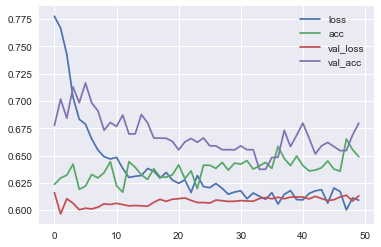

In [24]:
import numpy as np
from sklearn.model_selection import StratifiedKFold,KFold

kfold = KFold(n_splits=12,random_state=1000)
scores = []
# kfold = StratifiedKFold(n_splits=6, shuffle=True,random_state=1)
%matplotlib inline
import matplotlib.pyplot as plt
# Y_train = Y.argmax(1)

opt = keras.optimizers.Adam(lr = 0.00025,decay = 1e-6)
model.compile(optimizer=opt, loss = 'binary_crossentropy',  metrics=['accuracy'])

for train, test in kfold.split(X_Train, Y):

        h = model.fit(X_Train[train], Y[train], validation_data=(X_Train[test], Y[test]), epochs=50, batch_size=8)
        #  Visualization of training process
        scores.append([h.history["loss"],h.history["acc"],
                       h.history["val_loss"],h.history["val_acc"]])
    
scores = np.array(scores)
scores = np.mean(scores,axis= 0)
#print(scores)
labs = ["loss","acc","val_loss","val_acc"]
result = zip([l+'_mean' for l in labs],[s[-1] for s in scores])
[print(res) for res in result]
[plt.plot(scores[i],label=labs[i]) for i in range(len(scores))]
plt.legend()
plt.savefig('eval'+'.png', dpi=300,bbox_inches = 'tight') #bbox_inches可完整显示
plt.show()

In [41]:
print
np.mean(scores[3])

0.6659480641782284

In [26]:
print("train_size：",)
print("test_size：",)
print("training data Acc：",np.mean(scores[0]))
print("testing data Acc：",np.mean(scores[3]))

training data Acc： 0.635684683051754
testing data Acc： 0.6686835765341919


In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(X_Train,Y)
print(skf)
for train_index,test_index in skf.split(X_Train,Y):
    print("Train Index:",train_index,",Test Index:",test_index)
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=Y[train_index],Y[test_index]
    
    X_train = X_train/255.
    X_test = X_test/255.
    print ("number of training examples = " + str(X_train.shape[0]))
    print ("number of test examples = " + str(X_test.shape[0]))

    
 

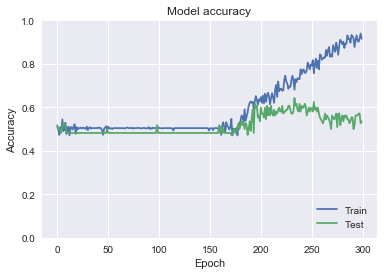

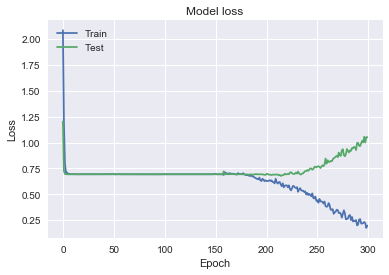

In [56]:
#  Visualization of training process
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim(0,1)

plt.figure(1)
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


#### 

In [ ]:
# Keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, Conv1D, BatchNormalization, MaxPool2D
from keras.optimizers import Adam            # 优化器
from sklearn.model_selection import train_test_split
import keras 
from keras import regularizers
import keras.backend as K
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

input_shape = X_Train.shape[1:] #（64,64,4）
num_classes = 2
model_name = 'wavelet_cnn.h5'

model = Sequential()

model.add(Conv2D(32, (3,3), padding = 'same', input_shape = input_shape, kernel_initializer = 'he_normal', name = 'conv2d_1'))
model.add(Activation('relu', name = 'activation_1'))
model.add(MaxPool2D(pool_size=(4,4) ,name = 'maxpool2d_1'))
# model.add(Dropout(0.25,name = 'dropout_1')) #Dropout通过随机断开神经网络之间的连接，减少每次训练时实际参与计算的模型的参数量，从而减少了模型的实际容量，来防止过拟合。


model.add(Conv2D(64, (3,3), padding = 'same',kernel_initializer = 'he_normal', name = 'conv2d_2'))
model.add(Activation('relu', name = 'activation_2'))
model.add(MaxPool2D(pool_size=(2,2), name = 'maxpool2d_2'))
model.add(Dropout(0.25,name = 'dropout_2'))

model.add(Flatten(name = 'flatten_1'))
model.add(Dense(500,kernel_initializer='he_normal' ,name='dense_1'))
model.add(Activation('relu' ,name='activation_4'))
model.add(Dropout(0.3,name = 'dropout_4'))
model.add(Dense(num_classes, kernel_initializer='he_normal',name='dense_2'))
model.add(Activation('sigmoid',name='activation_5'))

model.summary()


# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto')
 
def scheduler(epoch):
    # 每隔100个epoch，学习率减小为原来的1/10
    if epoch % 30 == 0 and epoch != 0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr * 0.1)
        print("lr changed to {}".format(lr * 0.1))
    return K.get_value(model.optimizer.lr)
 




# 优化方法
opt = keras.optimizers.Adam(lr = 0.00025,decay = 1e-6)

# opt = keras.optimizers.Adam(lr = 0.001)
# 编译模型

# reduce_lr = LearningRateScheduler(scheduler)
model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

x_train,x_test, y_train, y_test = train_test_split(X_Train,Y,test_size=0.2, random_state=0)

#  normalization
x_train = x_train/255
x_test = x_test/255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

history = model.fit(x_train, y_train, epochs=300, shuffle=False,validation_data=(x_test,y_test),batch_size=32)
model.save(model_name)




Instructions for updating:
Use tf.gfile.GFile.
(432, 576, 4)


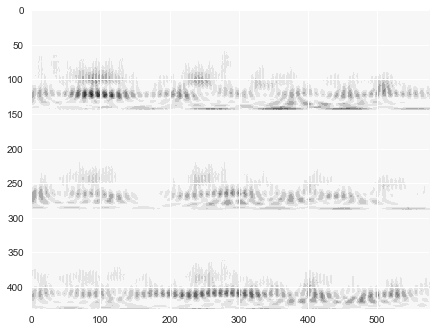

In [60]:
# # test
# # read figure Demo
# import matplotlib.pyplot as plt
# import tensorflow as tf

# # read binary data
# image_raw = tf.gfile.FastGFile(image_list[10],'rb').read()
# # tf decode
# img = tf.image.decode_jpeg(image_raw)  #Tensor
 
# with tf.Session() as sess:
#     img_ = img.eval()  # 等价于sess.run(img)
#     print(img_.shape)
    
# plt.figure(1)
# plt.imshow(img_)
# plt.show()

In [ ]:
https://nbviewer.jupyter.org/github/Prasad9/ImageAugmentationTypes/blob/master/ImageAugmentation.ipynb
http://www.wanghongbin.cn/github/dalinzhangzdl/BCI_MI_Wavelet_CNN/blob/master/CNN_wavelet_MI.ipynb